### Section 3: Let's code

Today, we will look at some coding in R. You will be learning
* how to look at and summarize your data
* how to run basic regressions
* how to interpret regression outputs
* how to interpret some of the most important techniques when running regressions
* how to visualize data and regression results (more on that next time!)

We will be using a (fictional) dataset on wages in California. We are interested whether there is a "gender wage gap", and how education and age affect one's earnings.

By now, you should know how to read in data. I will not be going over this. Instead, I will just show a piece of code that generates the dataset which we will be using. This can be useful for various things. 

You do not need to understand everything in this section.

In [1]:
set.seed(123456789)
data = data.frame(seq(1, 3000))
data$n = data$seq.1..3000.
data$seq.1..3000.=NULL
data$male = 0
data$male[data$n>=1613]=1
data$n = NULL

# Individual effect
data$individual = rnorm(3000,0,1)
# Gender effect (related to education)
data$rgender = rbinom(3000, 1, 0.1)*data$male


sampleDist = function(n) { 
    sample(x = c(8,9,10,11,12,13,14,15,16,9,10,11,12,13,14,10,11,15,12,17,17,10,12,11,13,15,15,14, 12, 12, 16, 11, 10, 10, 7, 10, 12, 12, 15, 15, 8, 9, 10, 12), n, replace = T) 
    }

# Make education variable
data$education = sampleDist(3000)
data$education = round(data$education+data$rgender*4*runif(3000,1,2)+rnorm(3000,0,0.1),digits=0)
data$education[data$education<=4] = 7
data$education[data$education==5] = 7
data$education[data$education==6] = 8

# Played videogames in childhood
data$videogames_childhood = round(runif(3000,0,8),digits=1)

# Education squared
data$educationsquared = (data$education)*(data$education)

# Wages
data$wage_monthly = 2000 + 100*data$individual + 50*data$male + 100*(data$education)

data$meduc = data$male*data$education
# Hourly wages
data$wage_hourly = 10 + 2*data$individual + 2*data$male + 1.5*(data$education) - 1*data$meduc
# Age
data$age = runif(3000,25,70)
data$agesquared = data$age*data$age
# Yearly wages
data$wage_yearly = 15000 + 1000*data$education + 1000*data$age - 9*data$agesquared + 1000*data$individual

data$individual = NULL
data$rgender = NULL
data$n = NULL
data$agesquared = NULL
data$educationsquared=NULL
data$meduc=NULL

data$male[data$male==0]="Female"
data$male[data$male==1]="Male"
print("Dataset successfully generated")

[1] "Dataset successfully generated"


Let us have a look at the data:

In [2]:
colnames(data)
head(data)

[1] "male"                 "education"            "videogames_childhood"
[4] "wage_monthly"         "wage_hourly"          "age"                 
[7] "wage_yearly"

,male,education,videogames_childhood,wage_monthly,wage_hourly,age,wage_yearly
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,15,6.2,3550.487,33.50974,66.53749,57197.22
2,Female,12,7.5,3239.588,28.79175,35.01332,51375.80
3,Female,15,1.4,3641.554,35.33108,50.80624,58990.31
4,Female,9,5.2,2827.768,22.05535,40.92588,49129.21
5,Female,12,5.8,3138.164,26.76329,38.96437,51682.01
6,Female,12,0.1,3043.738,24.87476,26.69552,45719.04


A couple of warm-up quiz questions for you:
* How many observations are there in the dataset?
* How many variables are there in the dataset?
* What proportion of the data is male?
* What is the average monthly wage in the data?

In [3]:
dim(data)
# Male-female
# mean(data$male)
# Ouch! Need to convert data

data$male[data$male=="Male"]=1
data$male[data$male=="Female"]=0
data$male = as.numeric(data$male)
mean(data$male)

mean(data$wage_monthly)

# Let us format these in a nicer way
print(round(mean(data$male),2))
print(round(mean(data$wage_monthly),10))

[1] 3000    7

[1] 0.4626667

[1] 3256.691

[1] 0.46
[1] 3256.691


Let us summarize the education data. What are mean and standard deviation? How does the data look like? Is there anything you notice?

You can do the same thing for monthly wages. Are there any outliers? How would you treat them?

[1] 12.306

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   10.00   12.00   12.31   14.00   25.00 

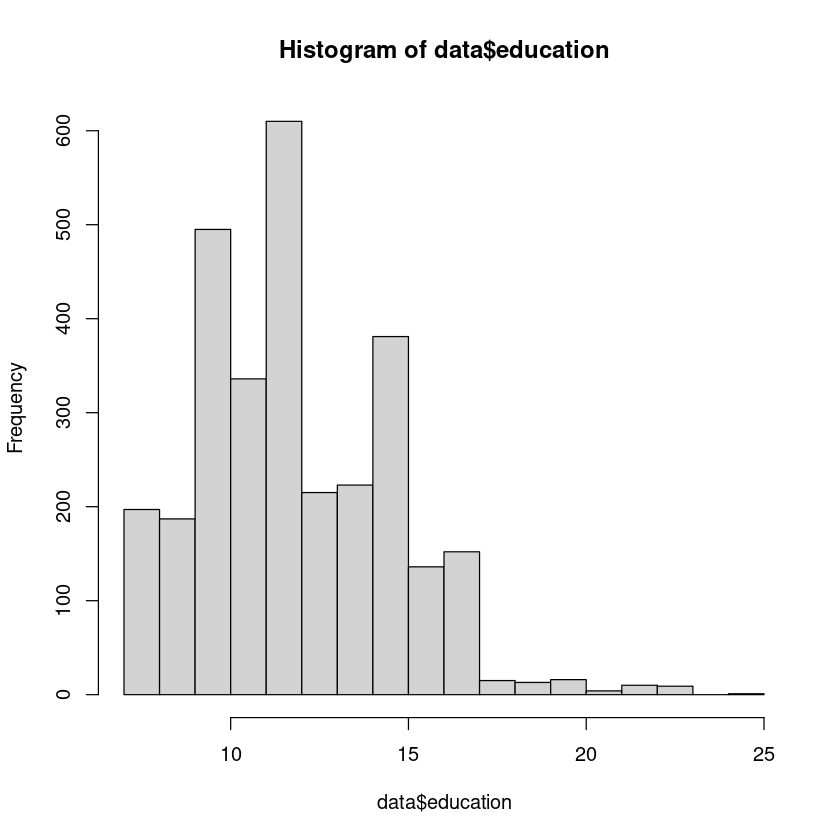

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2445    3046    3225    3257    3460    4704 

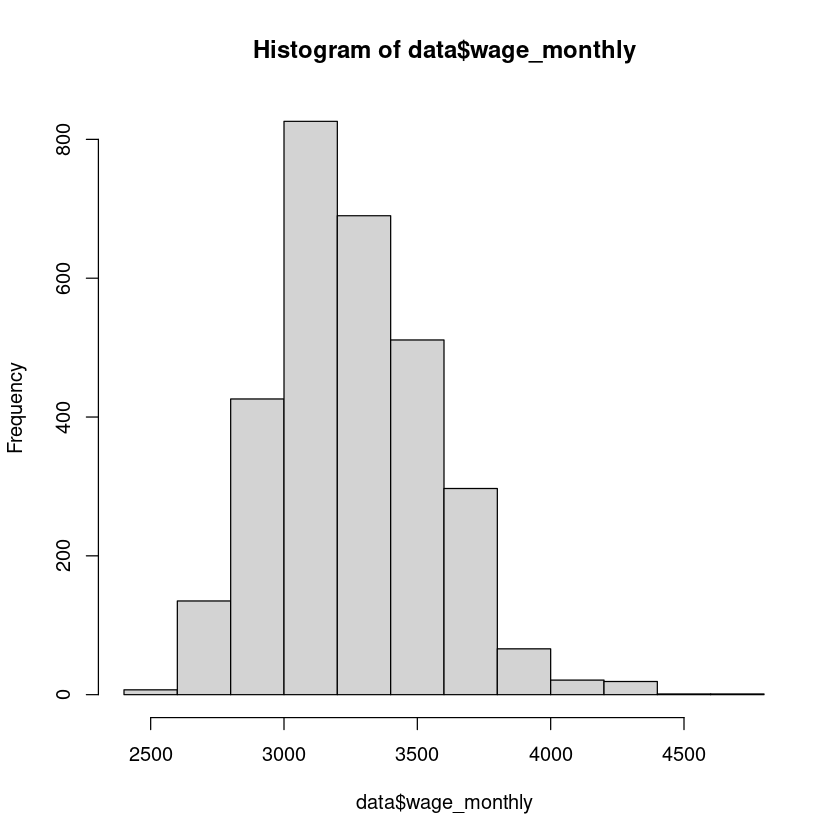

In [4]:
mean(data$education)
summary(data$education)
hist(data$education)

hist(data$wage_monthly)
summary(data$wage_monthly)

## Digging more into the data: Is there a gender wage gap?

We start with a basic linear model of wages ($w_i$), which we regress on gender ($m_i$) and education ($e_i$):

$$
w_i = \alpha + \beta_m \cdot m_i + \beta_e \cdot e_i + \epsilon_i
$$

How would you run this in ```R```?

In [5]:
gender_regression = summary(lm(wage_monthly ~ male , data=data))
print(gender_regression)



Call:
lm(formula = wage_monthly ~ male, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-755.30 -209.43  -26.06  201.42 1381.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3200.333      7.262  440.68   <2e-16 ***
male         121.810     10.677   11.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 291.6 on 2998 degrees of freedom
Multiple R-squared:  0.04161,	Adjusted R-squared:  0.04129 
F-statistic: 130.2 on 1 and 2998 DF,  p-value: < 2.2e-16



Let us interpret this regression output. 
* What is the meaning of the intercept?
* What is the meaning of the coefficient on "male"?
* What do the other parts of the output mean?
* Can you interpret the coefficient as the "gender wage gap"?

In [6]:
mean(data$wage_monthly[data$male==0])
mean(data$wage_monthly[data$male==1])

mean(data$wage_monthly[data$male==1]) - mean(data$wage_monthly[data$male==0])

[1] 3200.333

[1] 3322.143

[1] 121.8096

Let us consider whether videogames are determinants of wages. Let's include this in the regression as well.

In [7]:
# Incldue videogames
example_regression = summary(lm(wage_monthly ~ education + male + videogames_childhood , data=data))
print(example_regression)



Call:
lm(formula = wage_monthly ~ education + male + videogames_childhood, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-361.40  -67.91   -0.56   70.07  364.62 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2001.1694     9.1823  217.94   <2e-16 ***
education              99.8057     0.6789  147.02   <2e-16 ***
male                   54.8529     3.7536   14.61   <2e-16 ***
videogames_childhood    0.4836     0.8064    0.60    0.549    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.8 on 2996 degrees of freedom
Multiple R-squared:  0.8834,	Adjusted R-squared:  0.8833 
F-statistic:  7564 on 3 and 2996 DF,  p-value: < 2.2e-16



How would you interpret this regression? How do you interpret the constant here - and what about the coefficeints on male and videogames?

### Omitted variable bias

Since we also have education in our dataset, let us use it. Do you think education might be an "omitted variable"?

How does our estimate of the "gender wage gap" change if we include education as an additional variable in the regression? 


In [8]:
full_regression = summary(lm(wage_monthly ~ education + male , data=data))
print(full_regression)


Call:
lm(formula = wage_monthly ~ education + male, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.68  -68.17   -0.25   70.47  365.97 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2003.2132     8.5255  234.97   <2e-16 ***
education     99.7961     0.6786  147.06   <2e-16 ***
male          54.8694     3.7531   14.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 2997 degrees of freedom
Multiple R-squared:  0.8834,	Adjusted R-squared:  0.8833 
F-statistic: 1.135e+04 on 2 and 2997 DF,  p-value: < 2.2e-16



### The OVB formula
To formally investigate how the estimate for one coefficient changes if we include more variables in the regression, we do a small experiment. 

We will be running three regressions:
* 1: Full regression: Include gender and education
* 2: Short (biased) regression: Incldue gender only
* 3: Auxiliary regression: Regress education on gender

Can you find a relation between the coefficients?

In [9]:
full_regression = summary(lm(wage_monthly ~ education + male , data=data))
print(full_regression)

true_coefficient = full_regression$coefficients[3,1]
omitted_coefficient = full_regression$coefficients[2,1]

short_regression = summary(lm(wage_monthly ~ male, data=data))
print(short_regression)
biased_coefficient = short_regression$coefficients[2,1]

auxiliary_regression =summary(lm(education ~ male, data=data))
print(auxiliary_regression)
auxiliary_coefficient = auxiliary_regression$coefficients[2,1]

print(biased_coefficient)
print(true_coefficient + auxiliary_coefficient*omitted_coefficient)



Call:
lm(formula = wage_monthly ~ education + male, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.68  -68.17   -0.25   70.47  365.97 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2003.2132     8.5255  234.97   <2e-16 ***
education     99.7961     0.6786  147.06   <2e-16 ***
male          54.8694     3.7531   14.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 2997 degrees of freedom
Multiple R-squared:  0.8834,	Adjusted R-squared:  0.8833 
F-statistic: 1.135e+04 on 2 and 2997 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_monthly ~ male, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-755.30 -209.43  -26.06  201.42 1381.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3200.333      7.262  440.68   <2e-16 ***
male         121.810     10.677   11.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

### The Omitted Variable Bias Formula

From these regressions, we see that there is the following relation between the coefficients:

$$ \rho_s = \rho + \gamma \delta_{aux} $$

where $\rho$ is the "long" coefficient, $\gamma$ is the coefficient of the omitted variable in the long regression, $\delta_{aux}$ is the coefficient in the auxiliary regression, and $\rho_s$ is the "short" regression coefficient.

This relation is ALWAYS true - no matter whether we consider causality or now.

We can think about this to think about the direction of bias - in a crude way...


## Interpreting Interaction Terms

Maybe the effect of education is different between male and female respondents. To investigate this, we can use a technique called "Interaction Terms". Let us first create a variable that is the product of male and education.

In [10]:
data$male_times_education = data$male*data$education


We will be using hourly wages instead of monthly wages for this analysis. 
Our regression model looks like this. 

$$
w_i = \alpha + \beta_m \cdot \text{male}_i + \beta_e \cdot \text{education}_i + \beta_{me} \cdot \text{male}_i \cdot \text{education}_i + \epsilon_i
$$


How would we interpret the coefficients?

* Interpret $\beta_m$
* Interpret $\beta_e$
* Interpret $\beta_{me}$


Let us run the regression and have a look at the results:

In [11]:
interact_regression = summary(lm(wage_hourly ~ education + male + male_times_education , data=data))
print(interact_regression)

# Sidenote: There is a "more correct" way to do it:
interact_regression = summary(lm(wage_hourly ~ education + male + I(male*education) , data=data))
print(interact_regression)


Call:
lm(formula = wage_hourly ~ education + male + male_times_education, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2015 -1.3734 -0.0039  1.4061  7.2704 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.91772    0.25084  39.538  < 2e-16 ***
education             1.50814    0.02048  73.641  < 2e-16 ***
male                  2.36515    0.34440   6.867 7.91e-12 ***
male_times_education -1.02179    0.02735 -37.362  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.035 on 2996 degrees of freedom
Multiple R-squared:  0.8831,	Adjusted R-squared:  0.8829 
F-statistic:  7541 on 3 and 2996 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_hourly ~ education + male + I(male * education), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2015 -1.3734 -0.0039  1.4061  7.2704 

Coefficients:
                    Estimate Std. Error t val

## Wage and age: Exploring a life-cycle relationship

We may also be interested in the relation between age and wages (for this part of the analysis, we use yearly wages). What do you think this relationship may look like? Will wages increase in age or become smaller as people become older?

Let us make a plot!

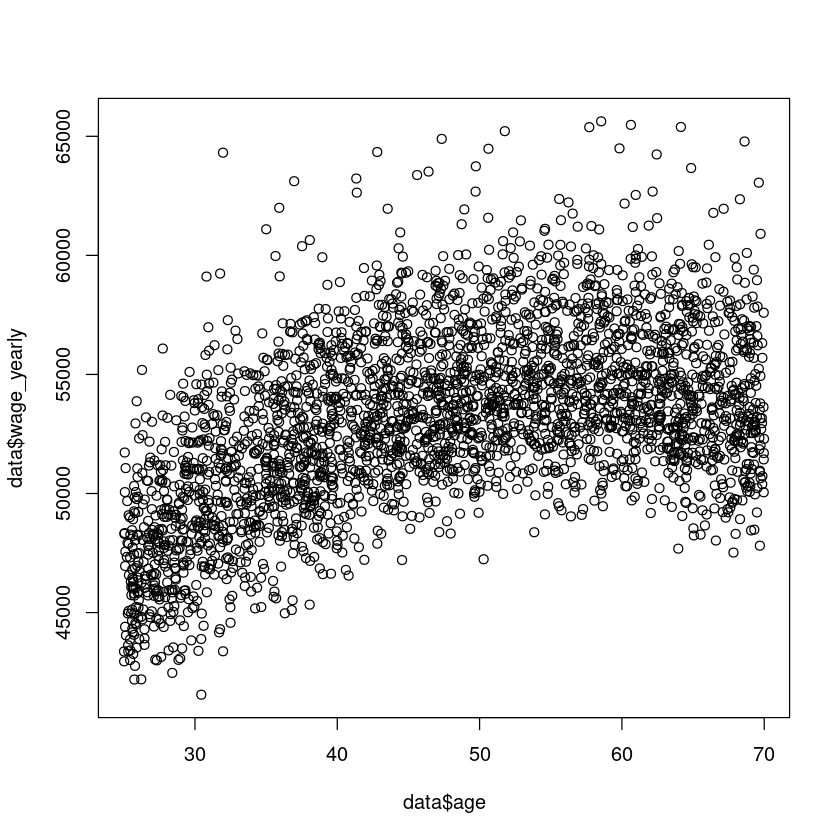

In [12]:
plot(data$age, data$wage_yearly)

How does this data look like? Do you think a simple linear model would fully capture the relationship between age age wages? What would you do to solve this issue?

Let us generate a new variable that is the square of the age. This looks like a parabola, so maybe we will be able to fit the data with a quadratic model.

In [13]:
data$agesquared = data$age*data$age

We now have a regression model that looks like this:

$$
w_i = \alpha + \beta_1 \cdot \text{age}_i + \beta_2 \cdot \text{age}_i^2 + \epsilon_i
$$

How do you interpret:
* $\beta_1$
* $\beta_2$

How do we expect $w_i$ to change if age goes up by one year?

Let us run the regression with the squared term:

In [14]:
quadratic_regression = summary(lm(wage_yearly ~ education + age + agesquared , data=data))
print(quadratic_regression)

# Sidenote: There is a "more correct" way to do it:
quadratic_regression = summary(lm(wage_yearly ~ education + age + I(age^2) , data=data))
print(quadratic_regression)


Call:
lm(formula = wage_yearly ~ education + age + agesquared, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3672.6  -675.4    -7.8   703.7  3679.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14876.5028   279.9794   53.13   <2e-16 ***
education     999.1717     6.7372  148.31   <2e-16 ***
age          1004.2690    11.6925   85.89   <2e-16 ***
agesquared     -9.0164     0.1219  -73.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1017 on 2996 degrees of freedom
Multiple R-squared:  0.9252,	Adjusted R-squared:  0.9251 
F-statistic: 1.235e+04 on 3 and 2996 DF,  p-value: < 2.2e-16


Call:
lm(formula = wage_yearly ~ education + age + I(age^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3672.6  -675.4    -7.8   703.7  3679.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14876.5028   279.9794   53.13   <2e-16 ***


## Summary: What we learned

Today, we:
* Saw how to get some very basic information (like means, standard deviations, etc.) from a dataset
* learned how to generate new variables
* learned how to run linear regressions 
* learned how to interpret the output of linear regressions
* looked at what happens if we forget to include an important variable in our regression: **omitted variable bias**!
* Learned two key techniques which allow us to analyze much more rich economic patterns in the world: Interaction effects and quadratic terms.